
## Overview

If we are planning on going out to see a movie, how well can we trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?


We are going to check whether Fandango's ratings(movie ticket company) in 2015 had a bias towards rating movies better to sell more tickets.
Site:(https://www.fandango.com)


[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1) Exploring Fandango Displayed Scores versus True User Ratings

First we will explore the Fandango ratings to see whether our analysis agrees with the article's conclusion.


In [32]:
fandango = pd.read_csv("fandango_scrape.csv")

In [33]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [34]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [35]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Showing the relationship with a scatterplot between rating and votes.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

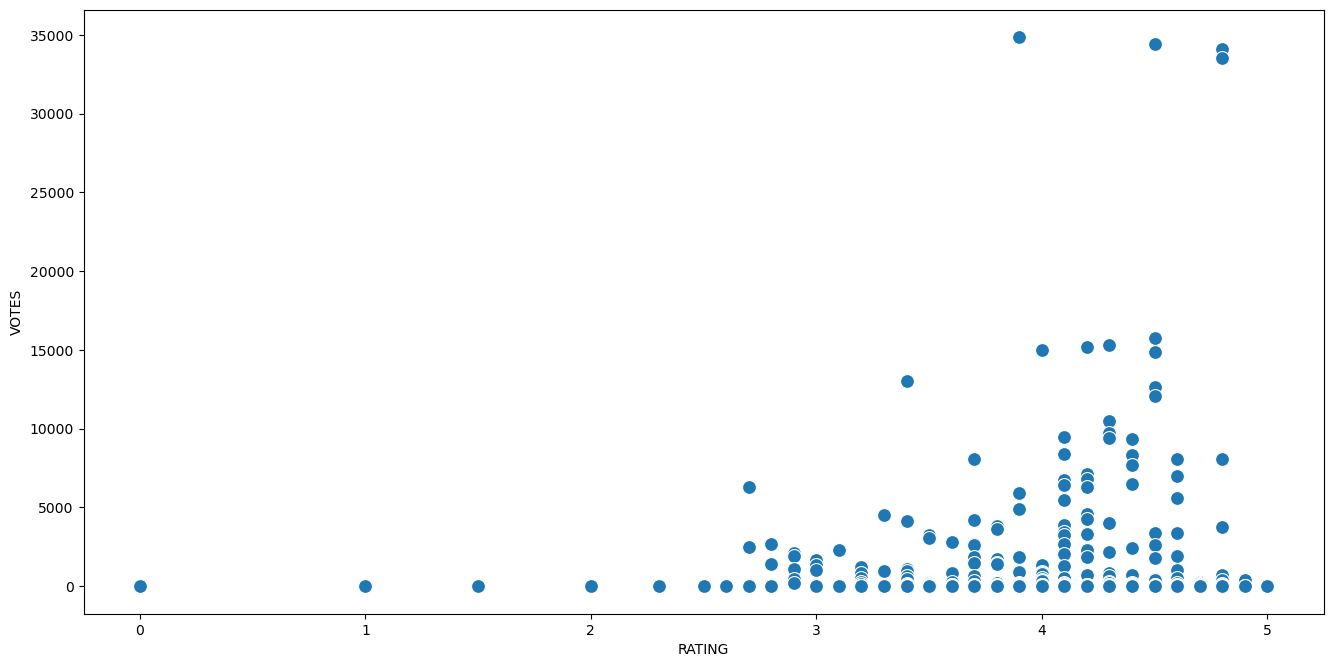

In [36]:
plt.figure(figsize=(16,8),dpi=100)
sns.scatterplot(x="RATING",y="VOTES",data=fandango,s=100)

**Correlation between the columns:**

In [37]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


    
**We Create a new column (Year)**

In [38]:
fandango["YEAR"]=fandango["FILM"].str.split("(").str[-1].str[0:4]

In [39]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Number of movies in the Fandango DataFrame per year**

In [40]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

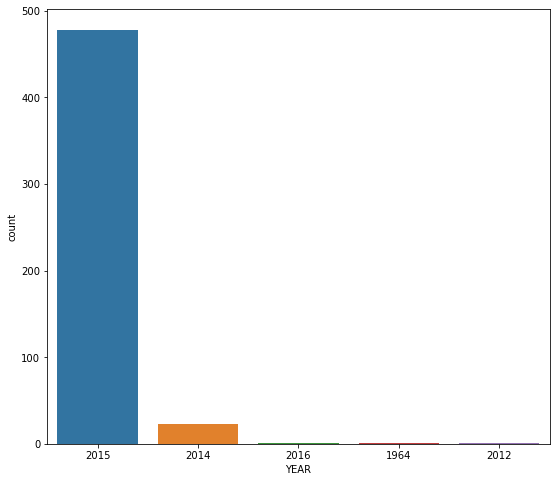

In [41]:
plt.figure(figsize=(9,8))
sns.countplot(x="YEAR",data=fandango)

**The top 10 movies with the highest number of votes**

In [42]:
fandango.nlargest(10,"VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Movies with zero votes**

In [43]:
kd=fandango["VOTES"]==0
kd.sum()

69

**DataFrame with films that have no zero votes.**

In [44]:
fan=fandango[fandango["VOTES"]>0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user.**

**Multiple kdeplots that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

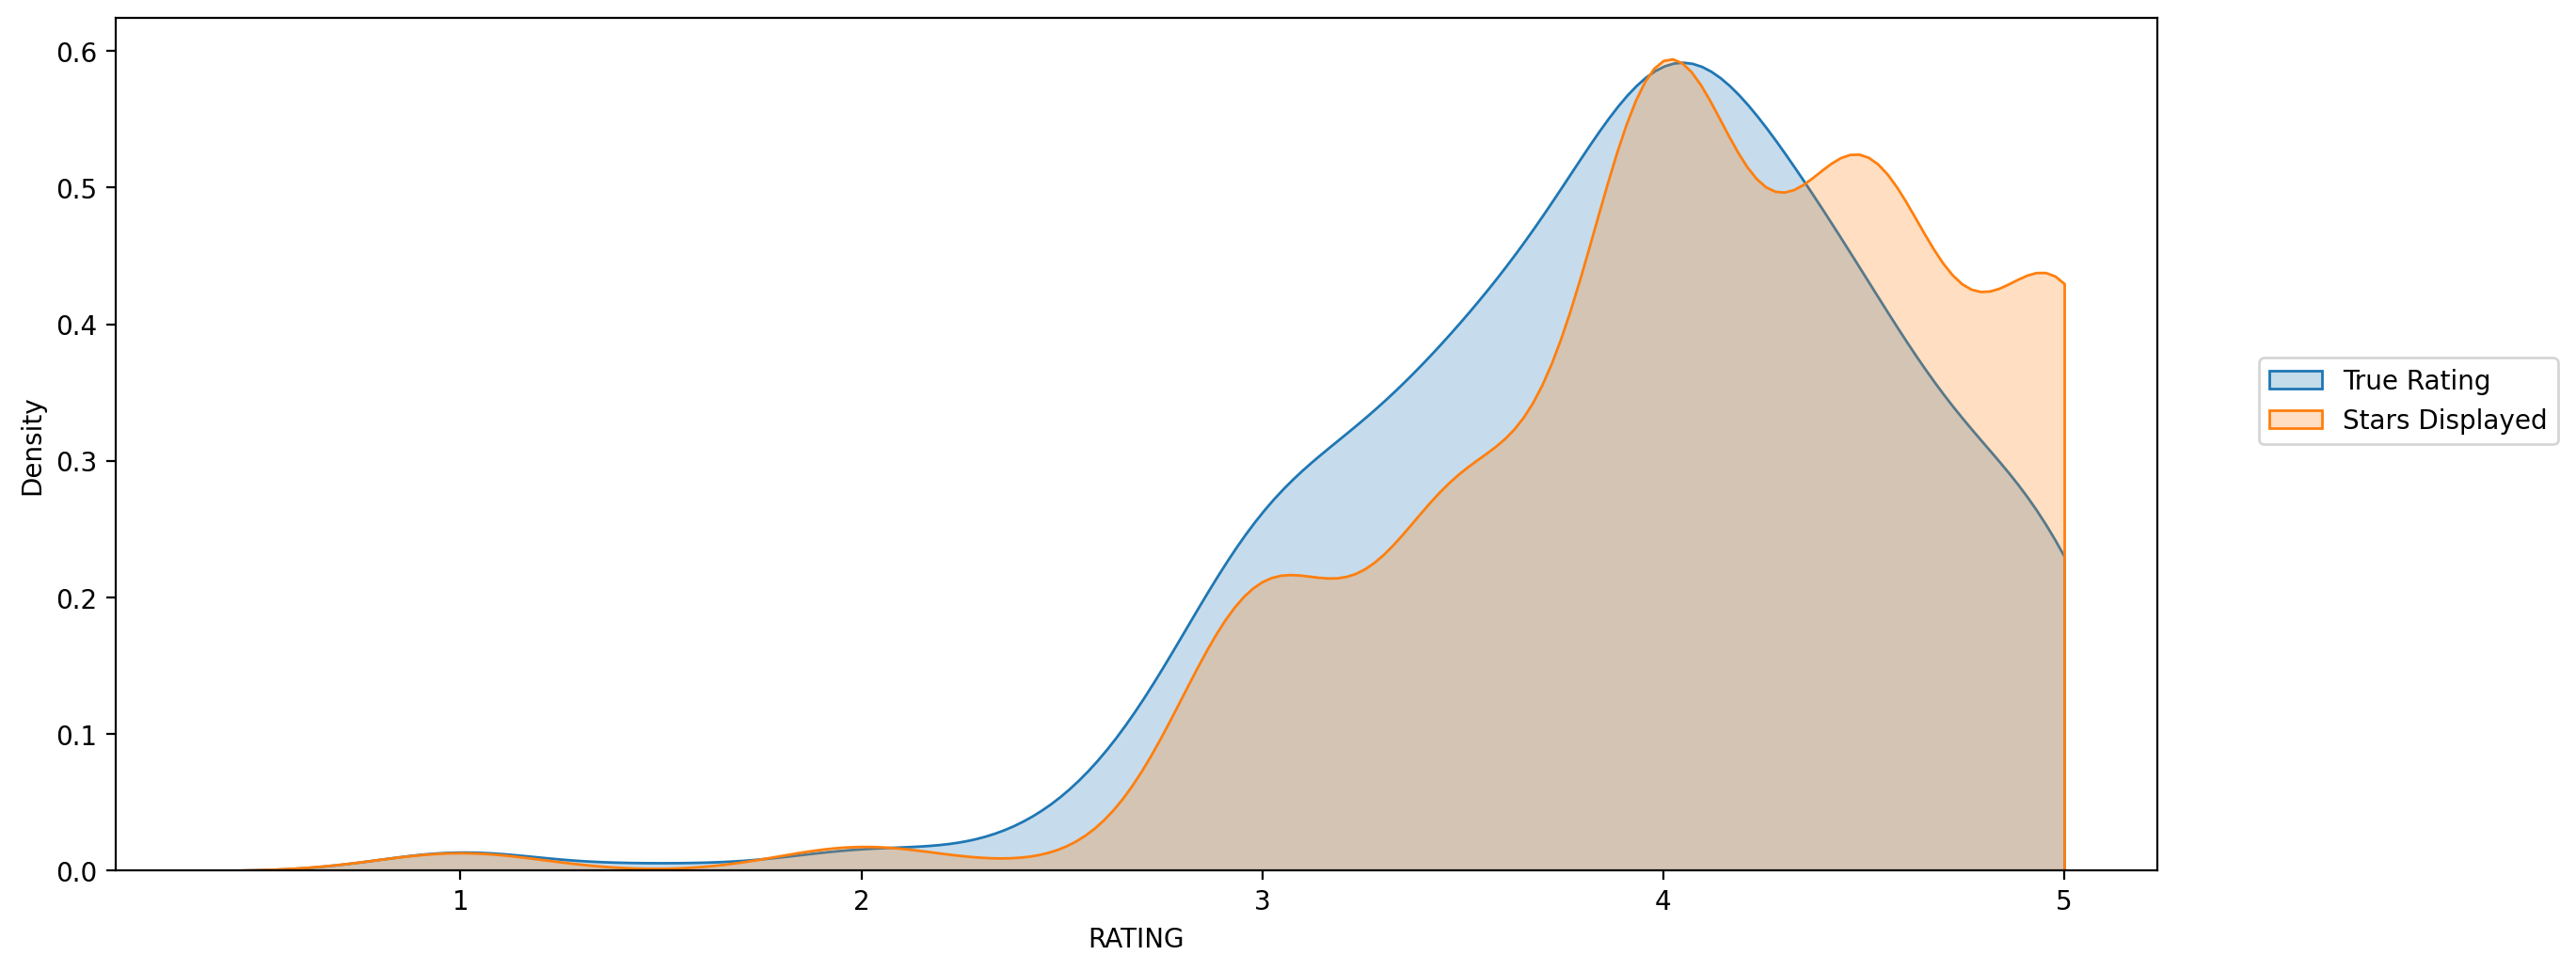

In [45]:
plt.figure(figsize=(14,6),dpi=200)
sns.kdeplot(x="RATING",data=fan,clip=(0,5),shade="Fill",label="True Rating")
sns.kdeplot(x="STARS",data=fan,clip=(0,5),shade="Fill",label="Stars Displayed")
plt.legend(loc=(1.05,0.5))

**We will create a new column of the difference between STARS displayed versus true RATING.**

In [46]:
fan["STARS_DIFF"]= np.round(fandango["STARS"]-fandango["RATING"],decimals=2)
fan

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

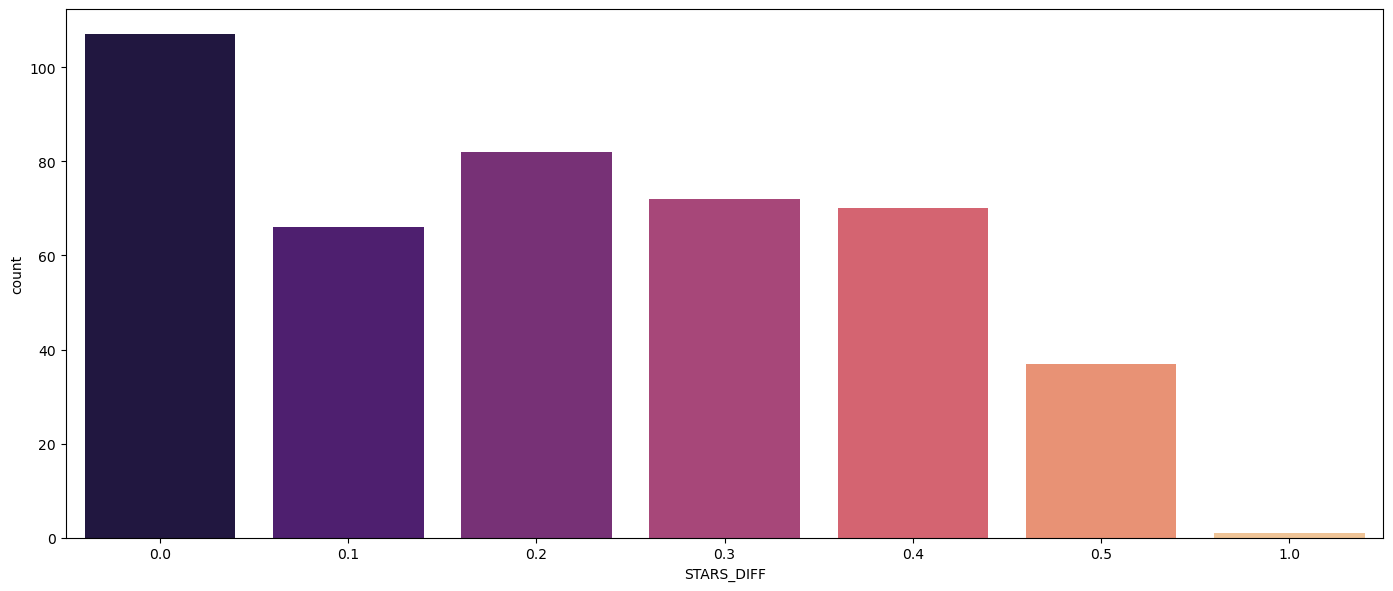

In [47]:
plt.figure(figsize=(17,7),dpi=100)
sns.countplot(x="STARS_DIFF",data=fan,palette='magma')

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating**

In [48]:
fan[fan["STARS_DIFF"]==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## 2) Comparison of Fandango Ratings to Other Sites

We will compare the scores from Fandango to other movies sites and see how they compare.


In [49]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [50]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [51]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [52]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Rotten Tomatoes has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 


**A scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

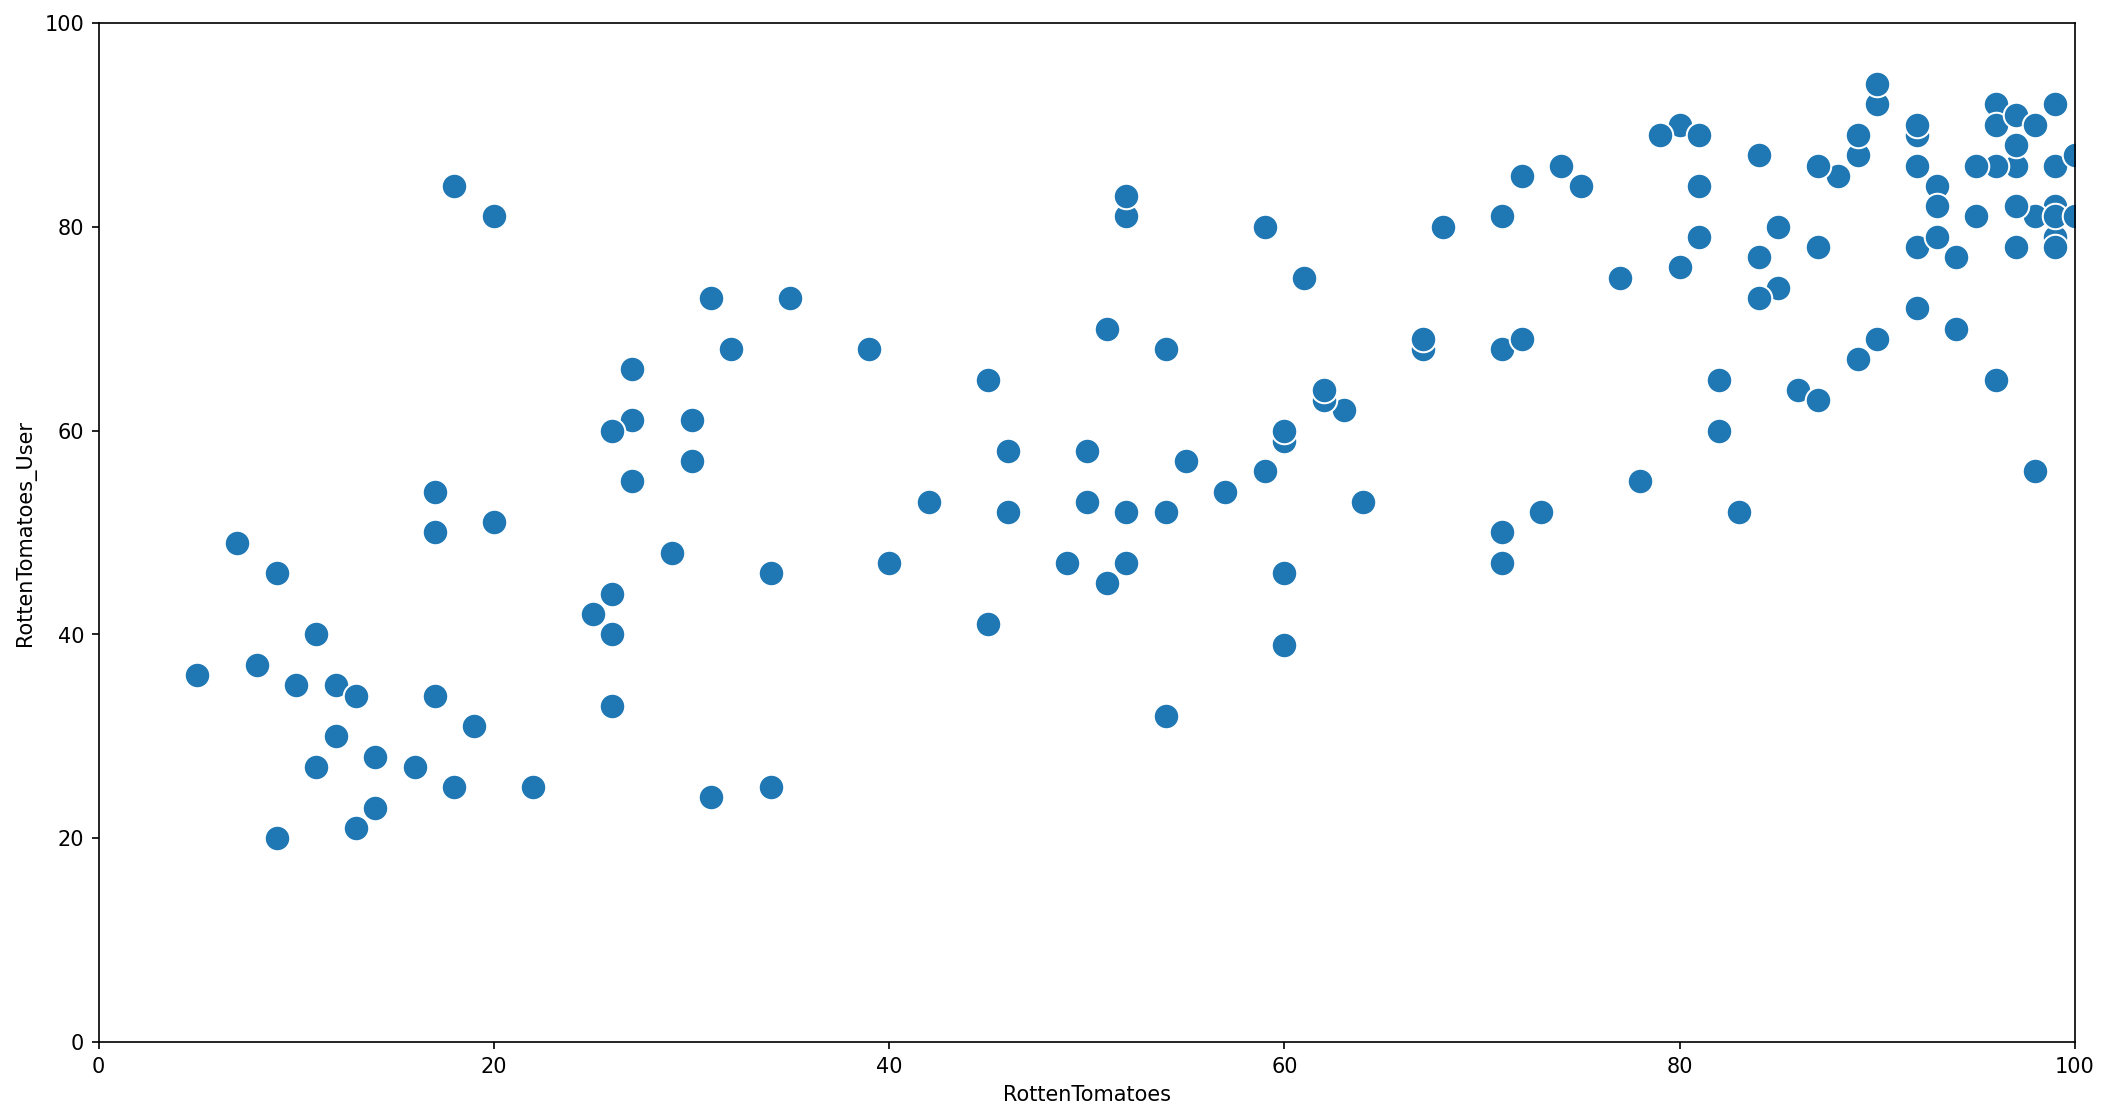

In [53]:
plt.figure(figsize=(17,9),dpi=150)
sns.scatterplot(x="RottenTomatoes",y="RottenTomatoes_User",data=all_sites,s=150)
plt.xlim(0,100)
plt.ylim(0,100)

We wil quantify the difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User.

**We will create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.**

In [54]:
all_sites["Rotten_Diff"]=all_sites["RottenTomatoes"]-all_sites["RottenTomatoes_User"]

In [55]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**The Mean Absolute Difference between RT scores and RT User scores as described above.**

In [56]:
all_sites["Rotten_Diff_abs"]=all_sites["Rotten_Diff"].apply(abs)

In [57]:
all_sites["Rotten_Diff"].mad()       #or all_sites['Rotten_Diff'].apply(abs).mean()

15.29217489209984

**We will plot the distribution of the differences between RT Critics Score and RT User Score.**

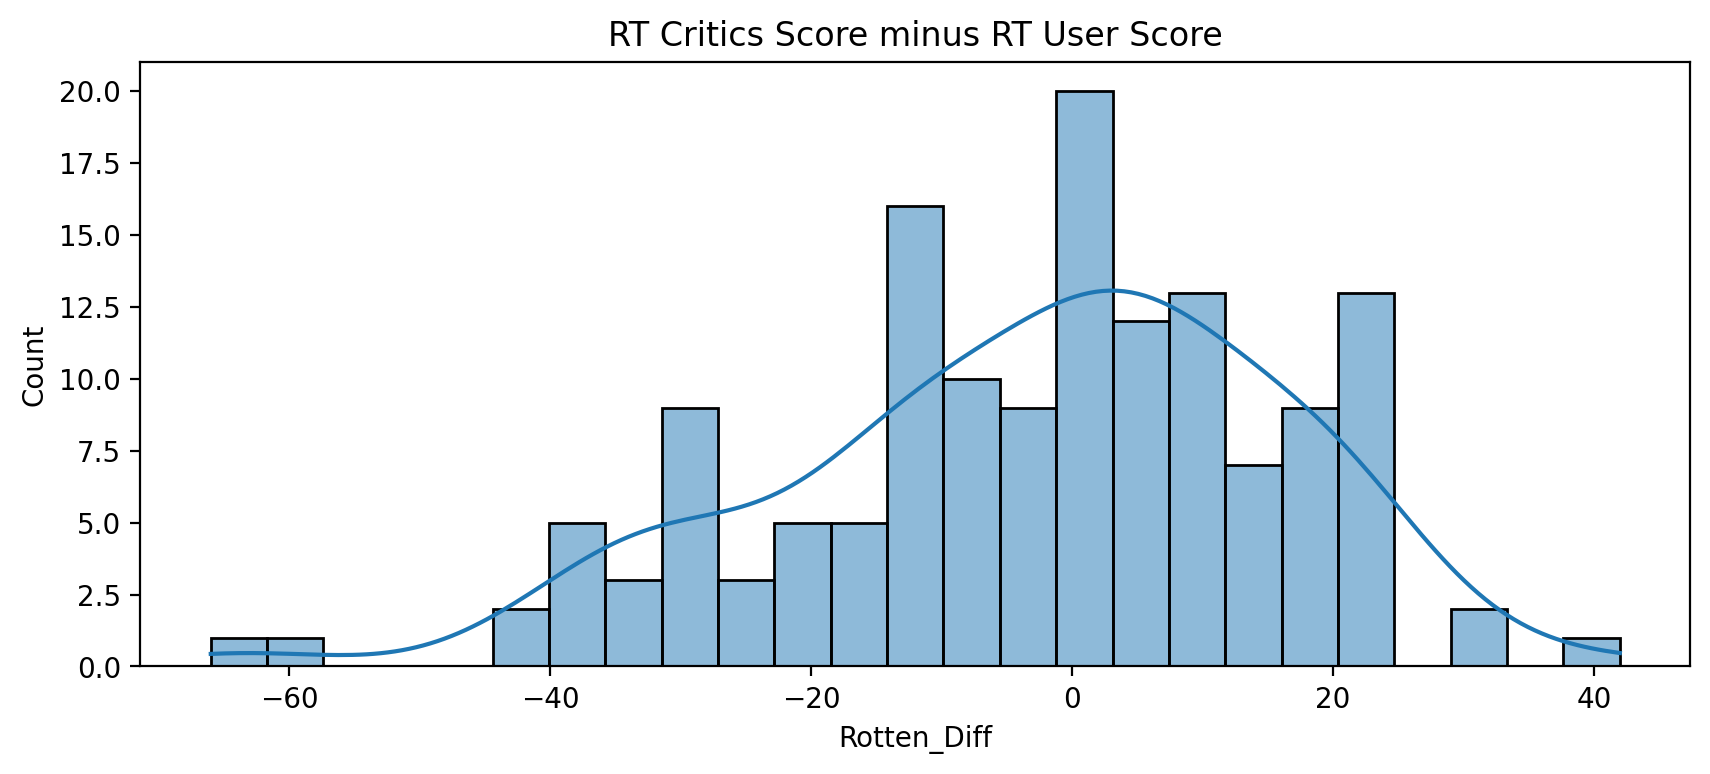

In [58]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

**Distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

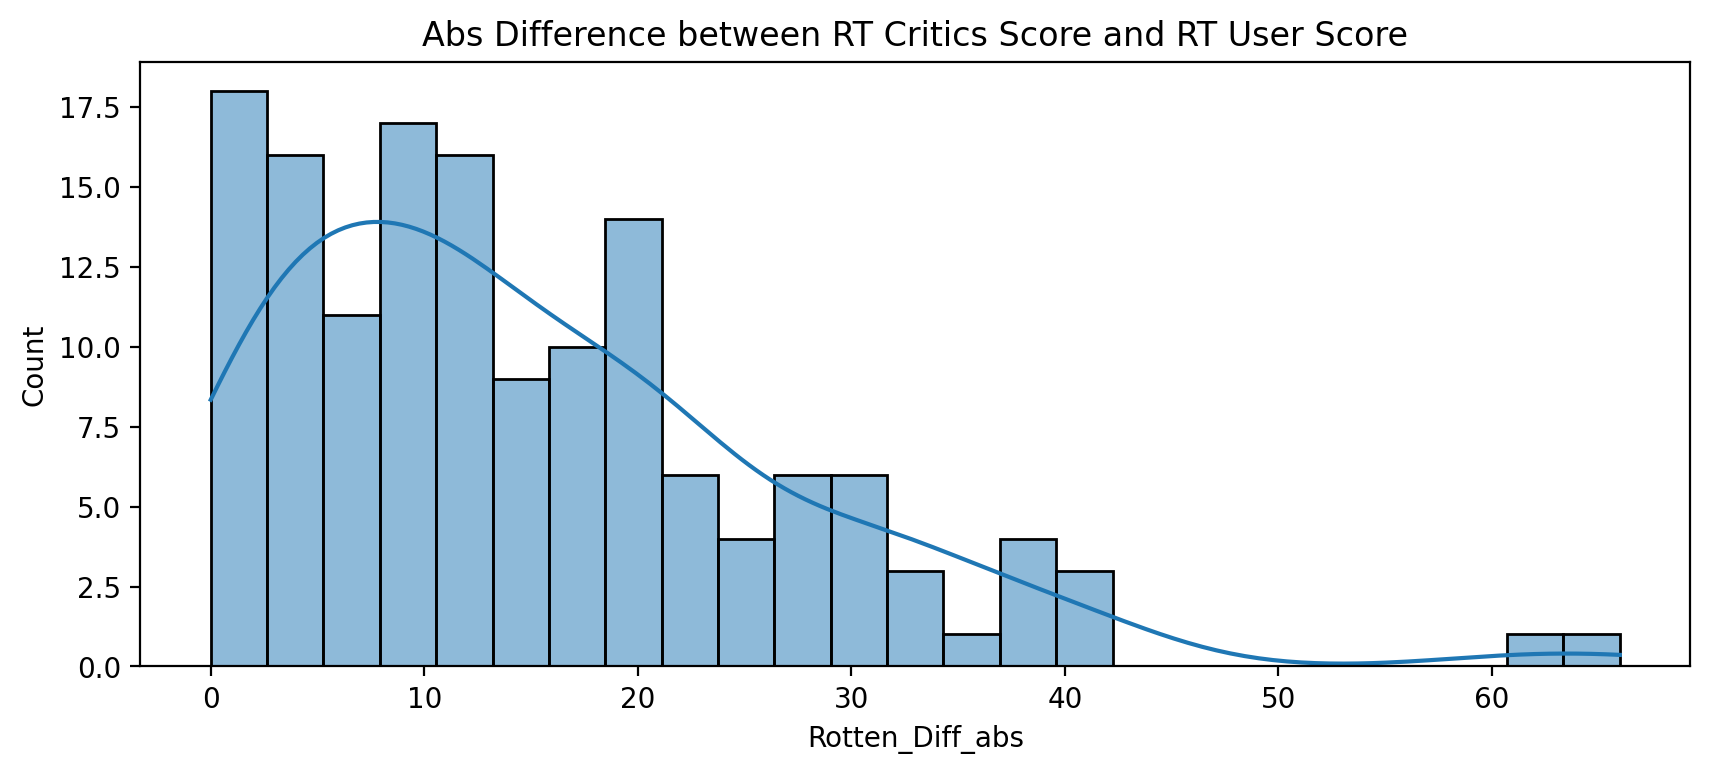

In [59]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff_abs',kde=True,bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score");

**The top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**The top 5 movies users rated higher than critics on average:**

In [60]:
print("Users Love but Critics Hate")
all_sites[["FILM","Rotten_Diff"]].nsmallest(5,"Rotten_Diff")

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scores higher than users on average.**

In [61]:
print("Critics love, but Users Hate")
all_sites[["FILM","Rotten_Diff"]].nlargest(5,"Rotten_Diff")

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Metacritic also shows an average user rating versus their official displayed rating.

**A scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

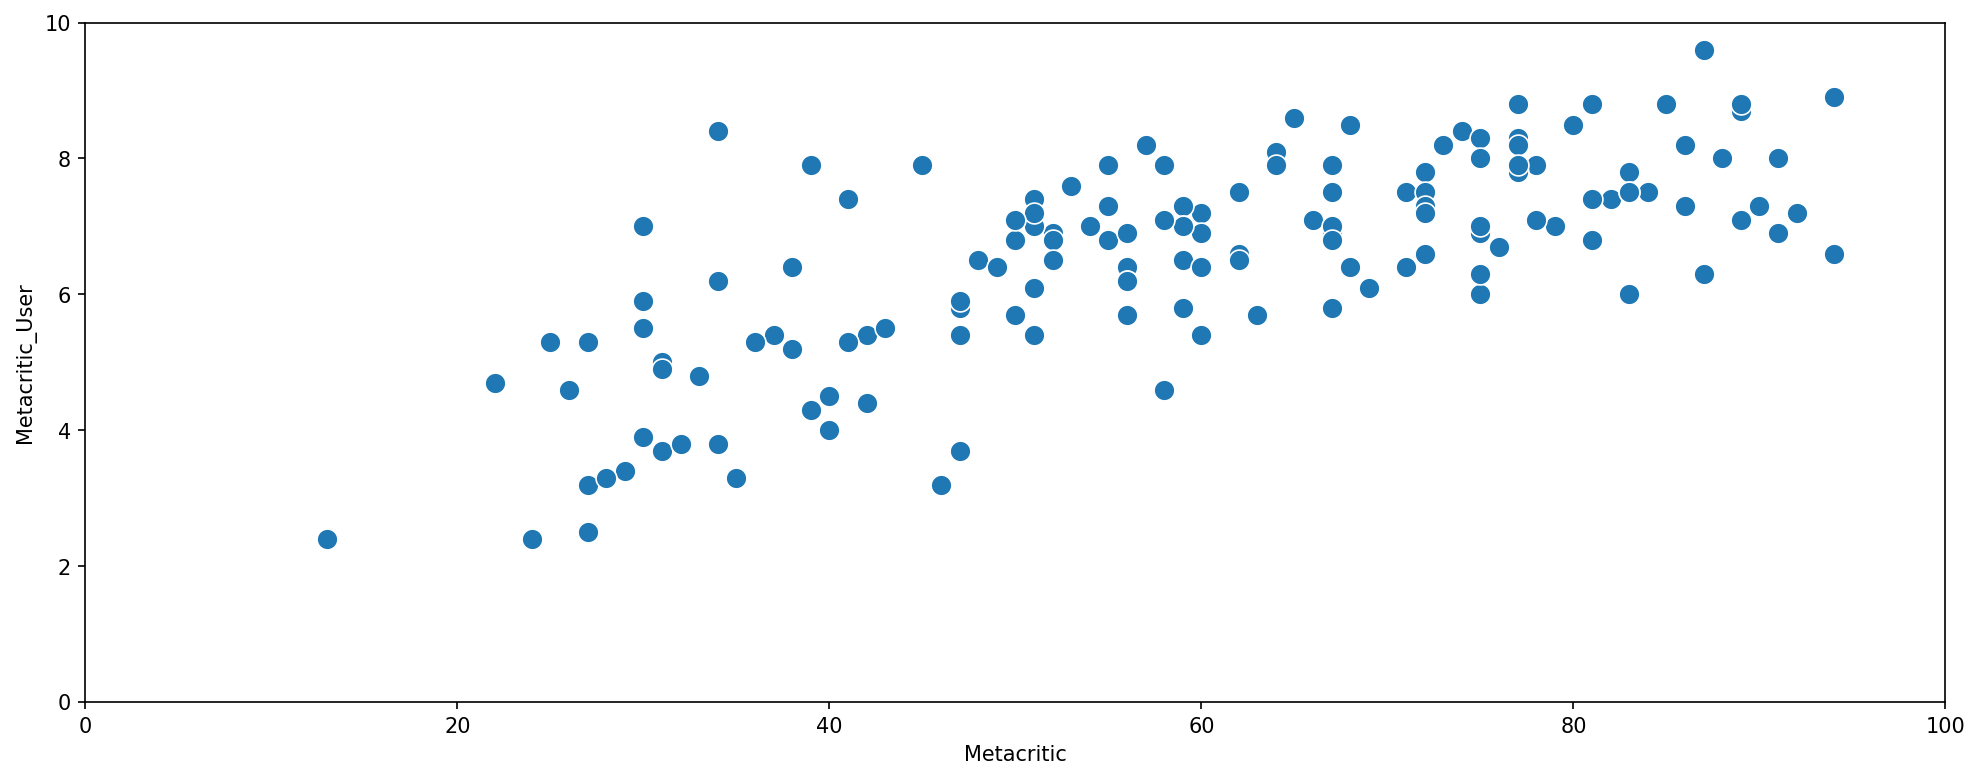

In [62]:
plt.figure(figsize=(16,6),dpi=150)
sns.scatterplot(x="Metacritic",y="Metacritic_User",data=all_sites,s=100)
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Both Metacritic and IMDB report back vote counts.

**A scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

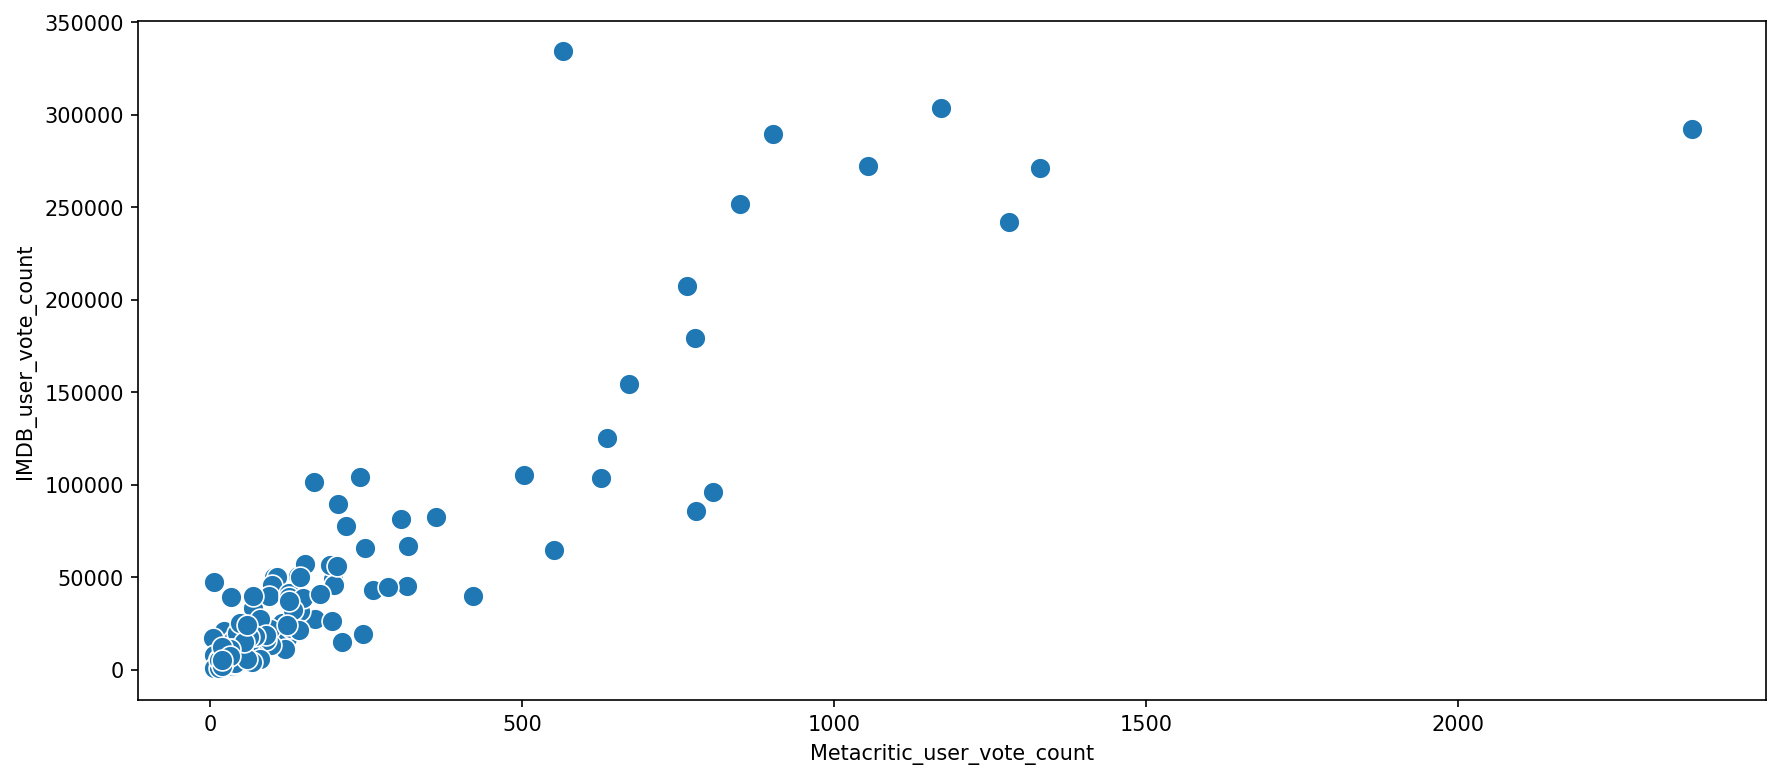

In [63]:
plt.figure(figsize=(14,6),dpi=150)
sns.scatterplot(x="Metacritic_user_vote_count",y="IMDB_user_vote_count",data=all_sites,s=100)

**There are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings**

**The highest IMDB user vote count for a movie**

In [64]:
all_sites.nlargest(1,"IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**The highest Metacritic User Vote count for a movie**

In [65]:
all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Let's explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**We will combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We will only compare movies that are in both DataFrames**

In [66]:
df=pd.merge(left=fandango,right=all_sites,how="inner",on="FILM")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  Rotten_Diff_abs             145 non

In [68]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does.We will *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.



In [69]:
df["RT_Norm"]=np.round(df["RottenTomatoes"]/20,decimals=1)

In [70]:
df["RTU_Norm"]=np.round(df["RottenTomatoes_User"]/20,decimals=1)

In [71]:
df["META_Norm"]=np.round(df["Metacritic"]/20,decimals=1)

In [72]:
df["META_U_Norm"]=np.round(df["Metacritic_User"]/2,decimals=1)

In [73]:
df["IMDB_Norm"]=np.round(df["IMDB"]/2,decimals=1)

In [74]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_abs,RT_Norm,RTU_Norm,META_Norm,META_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3


**We will create a norm_scores DataFrame that only contains the normalizes ratings**

In [75]:
norm_scores=df[["STARS","RATING","RT_Norm","RTU_Norm","META_Norm","META_U_Norm","IMDB_Norm"]]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,META_Norm,META_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


**A plot comparing the distributions of normalized ratings across all sites.**

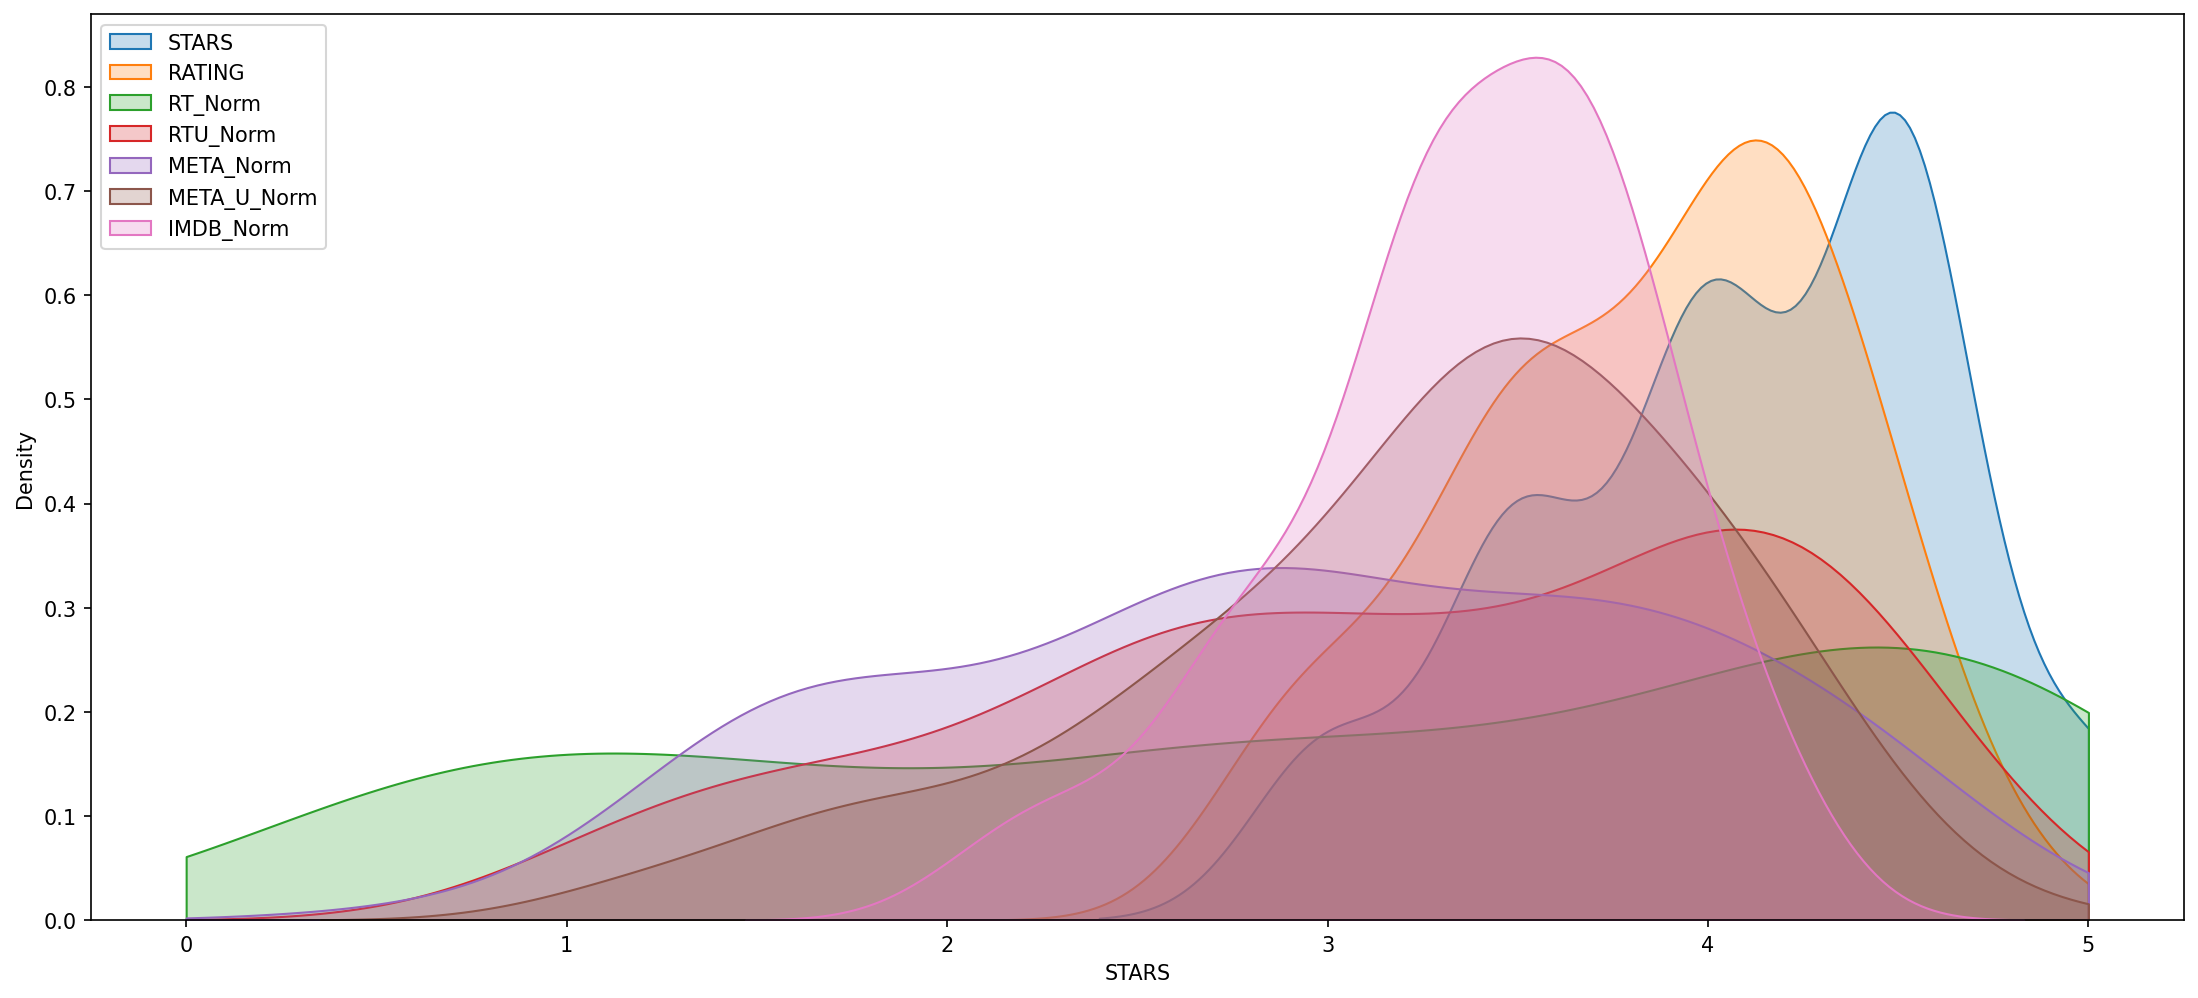

In [76]:
plt.figure(figsize=(18,8),dpi=150)
sns.kdeplot(x="STARS",data=norm_scores,clip=(0,5),shade="Fill",label="STARS")
sns.kdeplot(x="RATING",data=norm_scores,clip=(0,5),shade="Fill",label="RATING")
sns.kdeplot(x="RT_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="RT_Norm")
sns.kdeplot(x="RTU_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="RTU_Norm")
sns.kdeplot(x="META_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="META_Norm")
sns.kdeplot(x="META_U_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="META_U_Norm")
sns.kdeplot(x="IMDB_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="IMDB_Norm")
plt.legend(loc=2)

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution.** 

**A KDE plot that compares the distribution of RT critic ratings against the STARS displayed by Fandango.**

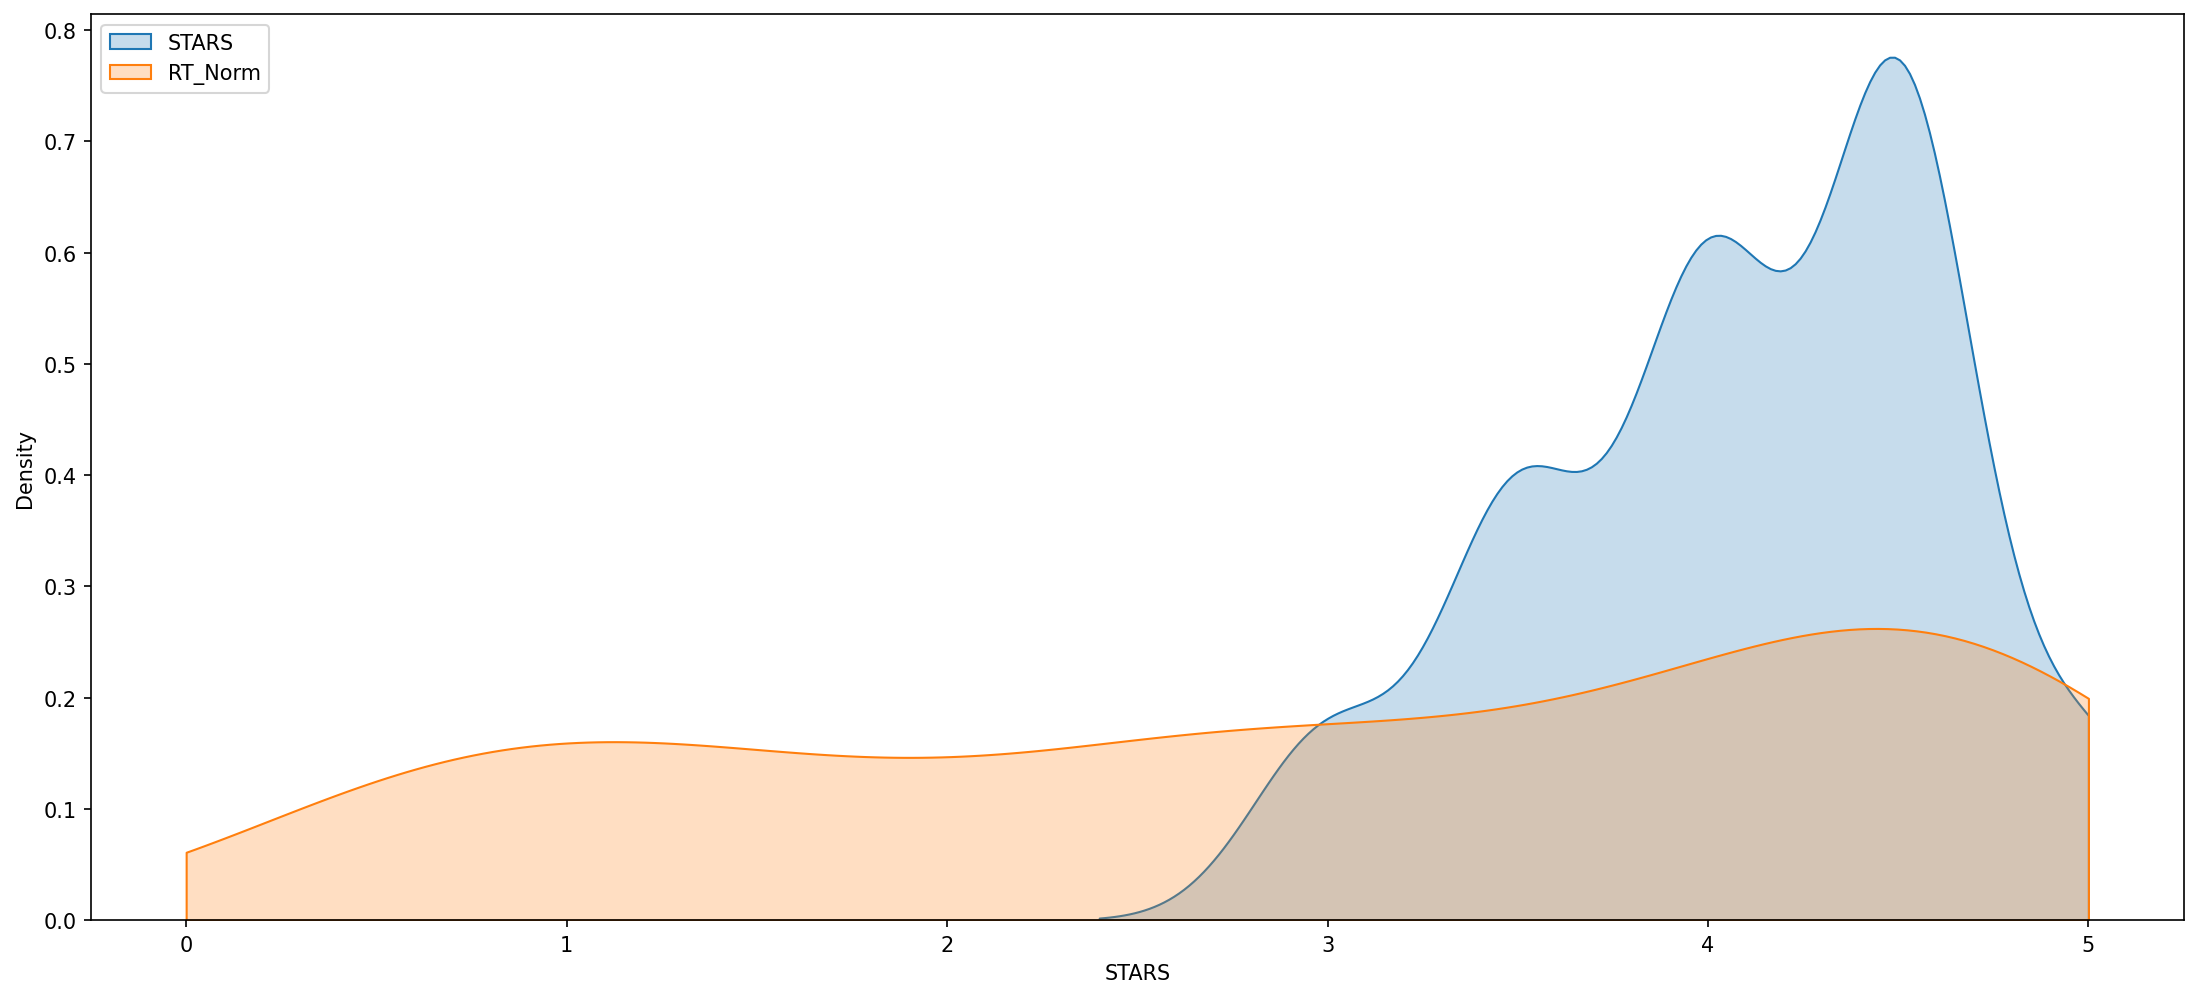

In [77]:
plt.figure(figsize=(18,8),dpi=150)
sns.kdeplot(x="STARS",data=norm_scores,clip=(0,5),shade="Fill",label="STARS")
sns.kdeplot(x="RT_Norm",data=norm_scores,clip=(0,5),shade="Fill",label="RT_Norm")
plt.legend(loc=2)

**A histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

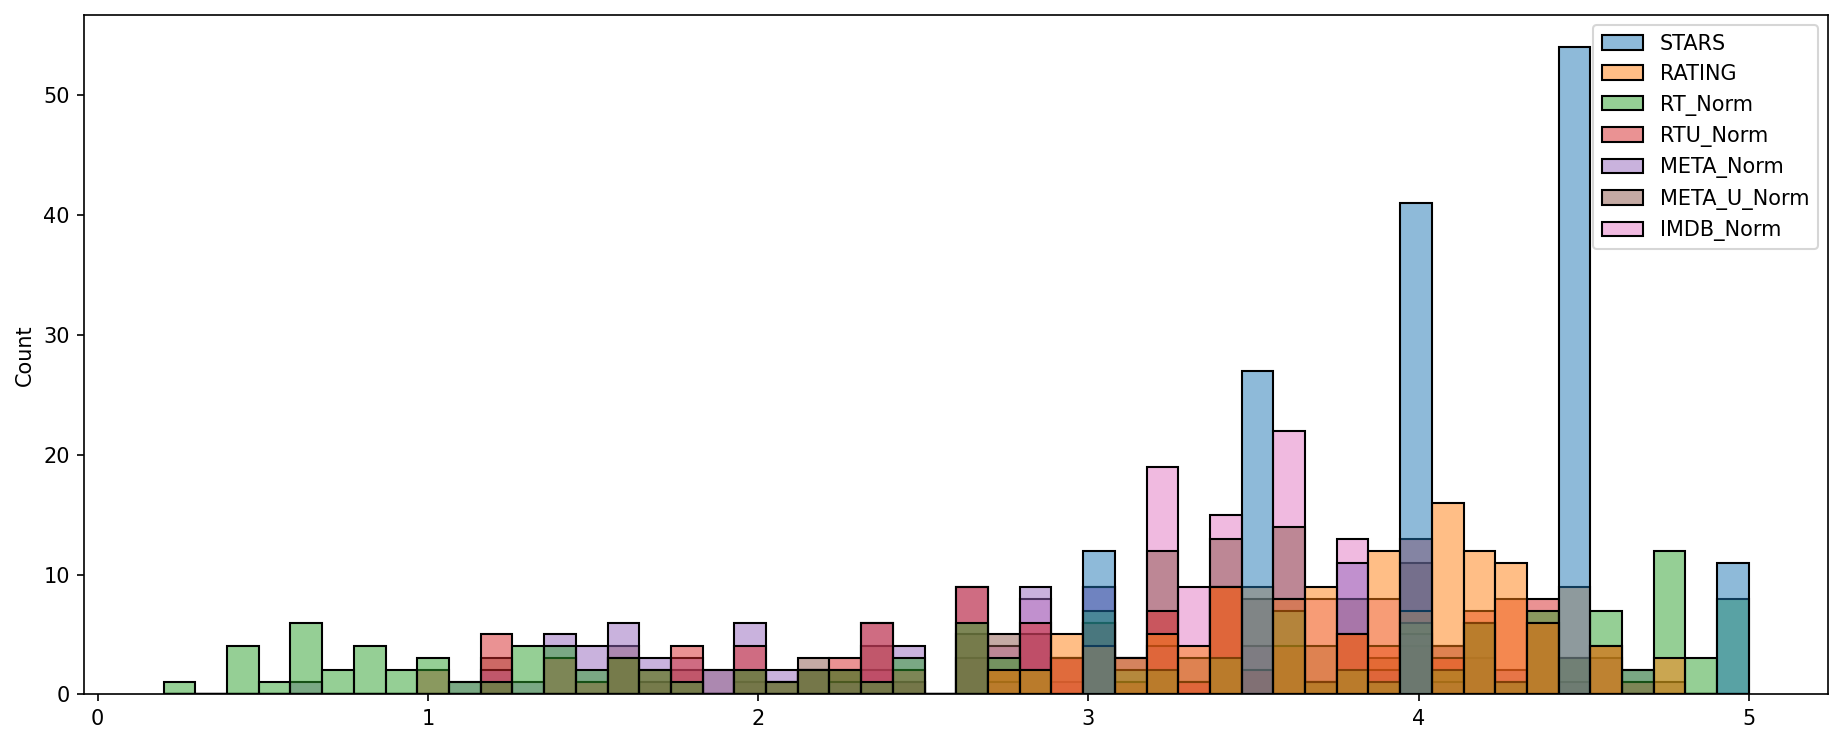

In [78]:
plt.figure(figsize=(15,6),dpi=150)
sns.histplot(data=norm_scores,bins=50)


### The worst movies rated across all platforms

**A clustermap visualization of all normalized scores.**

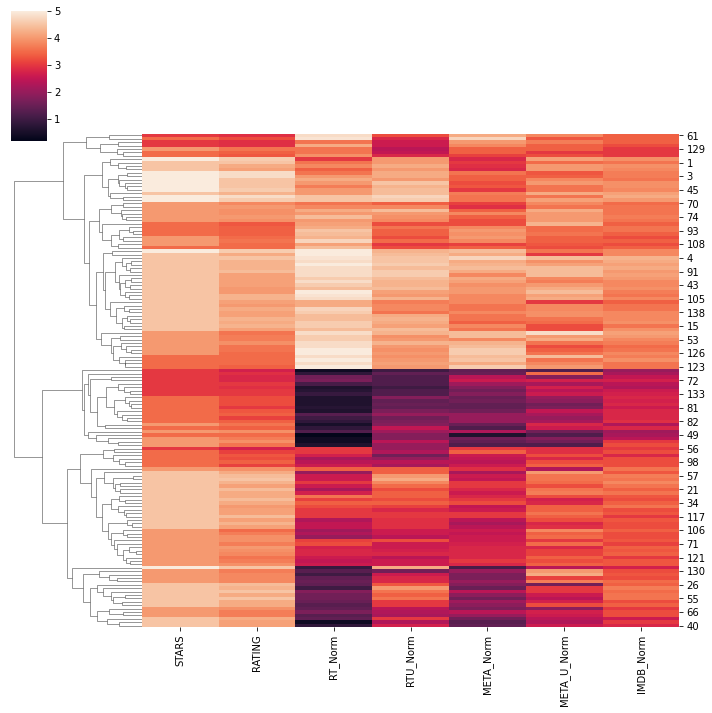

In [79]:
sns.clustermap(data=norm_scores,col_cluster=False)

**Clearly Fandango is rating movies much higher than other sites.Based off the Rotten Tomatoes Critic Ratings,the top 10 lowest rated movies**

In [80]:
norm_scores["FILM"]=df["FILM"]


In [81]:
score=norm_scores.nsmallest(10,"RT_Norm")

In [86]:
score

,STARS,RATING,RT_Norm,RTU_Norm,META_Norm,META_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**The distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

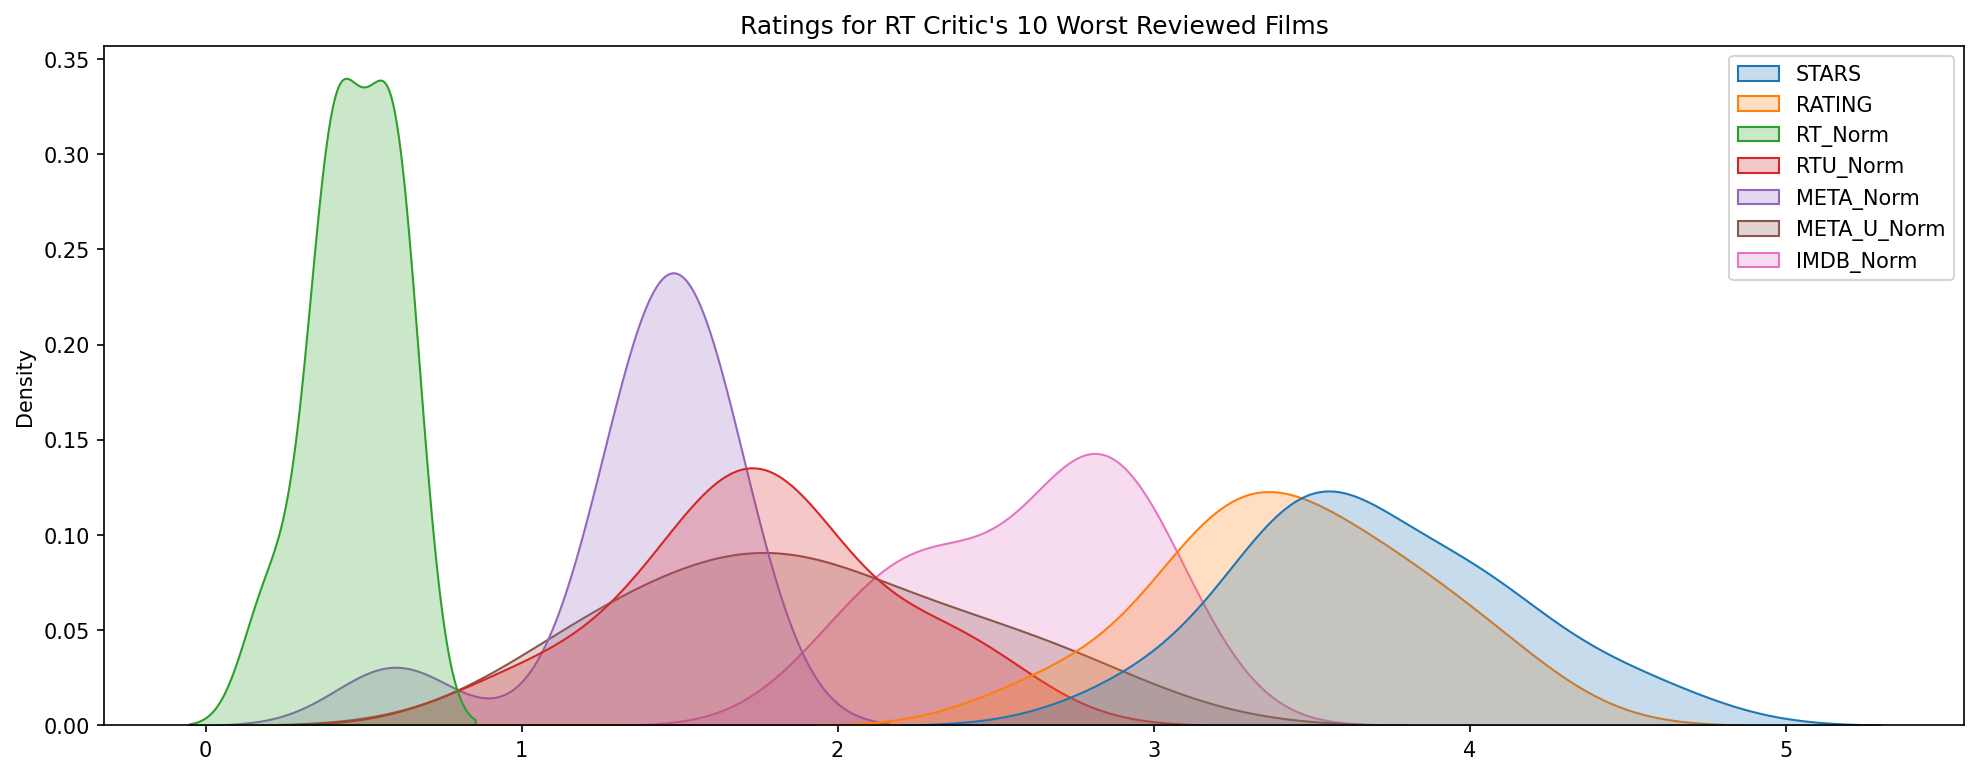

In [82]:
plt.figure(figsize=(16,6),dpi=150)
sns.kdeplot(data=score,shade=True)
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**We can clearly see Fandango is showing around 3-4 star ratings for films that are clearly bad!The biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [83]:
norm_scores.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
META_Norm                 1.3
META_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [84]:
0.4+2.3+1.3+2.3+3

9.3

In [85]:
9.3/5

1.86

----